In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [112]:
x_first = [float(x) for x in "10 8 25 24 23 22.8 22.5 22.2 30 29 28 27 26 25 17 24 23 22 21 14 6".split(" ")]
print(x)

[10.0, 8.0, 25.0, 24.0, 23.0, 22.8, 22.5, 22.2, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 22.3, 24.0, 23.0, 20.0, 19.0, 14.0, 6.0]


In [90]:
def yo(x, times=0):
    result = [x[0]]
    for ix in range(1, len(x)):
        if x[ix] < x[ix-1]:
            result.append(x[ix])
    #print(result)
    #plt.plot(result, 'o-')
    #plt.show()
    return [result,times] if len(result)==len(x) else yo(result, times+1)

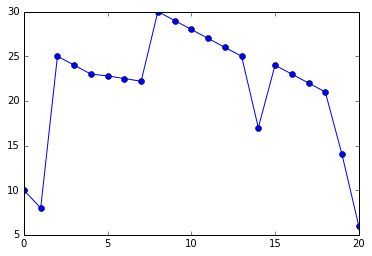

[10.0, 8.0, 25.0, 24.0, 23.0, 22.8, 22.5, 22.2, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 17.0, 24.0, 23.0, 22.0, 21.0, 14.0, 6.0]
[10.0, 8.0, 24.0, 23.0, 22.8, 22.5, 22.2, 29.0, 28.0, 27.0, 26.0, 25.0, 17.0, 23.0, 22.0, 21.0, 14.0, 6.0]
[10.0, 8.0, 23.0, 22.8, 22.5, 22.2, 28.0, 27.0, 26.0, 25.0, 17.0, 22.0, 21.0, 14.0, 6.0]
[10.0, 8.0, 22.8, 22.5, 22.2, 27.0, 26.0, 25.0, 17.0, 21.0, 14.0, 6.0]
[10.0, 8.0, 22.5, 22.2, 26.0, 25.0, 17.0, 14.0, 6.0]
[10.0, 8.0, 22.2, 25.0, 17.0, 14.0, 6.0]
[10.0, 8.0, 17.0, 14.0, 6.0]
[10.0, 8.0, 14.0, 6.0]
[10.0, 8.0, 6.0]
[10.0, 8.0, 6.0]


[[10.0, 8.0, 6.0], 8]

In [69]:
plt.plot(x, 'o-')
plt.show()
print(x)
yo(x)

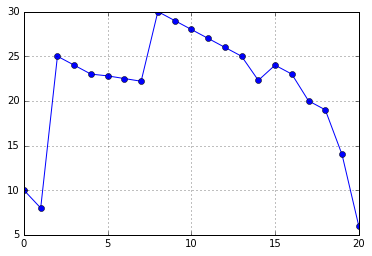

[[10.0, 8.0, 6.0], 10]

In [119]:
x_second = [float(x) for x in "10 8 25 24 23 22.8 22.5 22.2 30 29 28 27 26 25 22.3 24 23 20 19 14 6".split(" ")]
plt.plot(x_second, 'o-')
plt.grid()
plt.show()
yo(x_second)

In [127]:
x1 = [xx for xx in x_first]
stack_elems = []
killer_ix = None
ttl_max = -1
last_min_value = None
for head_main in range(len(x1)):
    curr_val = x1[head_main]
    if(head_main==0):
        stack_elems.append({'ix': head_main, 'ttl': -1, 'val': curr_vals})
        last_min_value = curr_val
        continue
    print(head_main, curr_val, stack_elems)
    
    # rising edge
    if(x1[head_main] > x1[head_main-1]):
        if((head_main-1) == stack_elems[-1]['ix']): # to avoid duplication
            continue
        ttl_curr = head_main-1-stack_elems[-1]['ix']
        stack_elems.append({'ix':head_main-1,
                            'ttl': ttl_curr,
                            'val': x1[head_main-1]
                           })
        ttl_max = max(ttl_curr, ttl_max)
            
    # falling edge
    if(x1[head_main] < x1[head_main-1]):
        # immortal node
        if(curr_val < last_min_value):
            stack_elems.append({'ix': head_main, 'ttl': -1, 'val': curr_val})
            last_min_value = curr_val
            continue
            
        if(curr_val < stack_elems[-1]['val']):
            ttl_current = stack_elems[-1]['ttl']+1
            stack_elems.append({'ix': head_main, 'ttl': ttl_current, 'val': curr_val})
            ttl_max = max(ttl_max, ttl_current)

        
print(ttl_max)

1 8.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}]
2 25.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
3 24.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
4 23.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
5 22.8 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
6 22.5 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
7 22.2 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
8 30.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}]
9 29.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}, {'ix': 7, 'ttl': 6, 'val': 22.2}]
10 28.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}, {'ix': 7, 'ttl': 6, 'val': 22.2}]
11 27.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}, {'ix': 7, 'ttl': 6, 'val': 22.2}]
12 26.0 [{'ix': 0, 'ttl': -1, 'val': 10.0}, {'ix': 1, 'ttl': -1, 'val': 8.0}, {'ix':

In [89]:
x1 = [xx for xx in x]
stack_elems = []
killer_ix = None
for head_main in range(len(x1)):
    if(head_main==0):
        stack_elems.append((head_main,-1))
        continue
        
    # rising edge
    if(x1[head_main] > x1[head_main-1]):
        print(head_main, x1[head_main], stack_elems[-1])
        if((head_main-1) != stack_elems[-1][0]): # to avoid duplication
            stack_elems.append((head_main-1, head_main-1-stack_elems[-1][0]))
            
    # falling edge
    if(x1[head_main] < x1[head_main-1]):
        # if i am less than top of the stack
        # which means i will be shot down by his killer,
        # i will have one more clocktick to live
        # if that guy is unkillable (killer_ix==-1)
        # then i am immortal as well
        if(stack_elems[-1][1] == -1):
            stack_elems.append((head_main, -1))
            time_yo = 0
        # if i am less than the last element in the stack
        # then his killer will kill me and i have one more clock tick
        elif(x1[stack_elems[-1][0]] <  x1[head_main]):
            stack_elems.append((head_main, x1[stack_elems[-1][1]]+1))
        else:
            time_yo += 1
        
print(stack_elems)       

2 25.0 (0, -1)
8 30.0 (1, 1)
15 24.0 (7, 6)
[(0, -1), (1, 1), (7, 6), (14, 7)]
